# Introduction

---

Onur Ümit Şener

2006102010


---


EEE-311 Introduction to Machine Learning 

Final Project

# Imports

---



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import data_table
from pprint import pprint

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/hardenedcotton/ML_Project/main/CarPrice_Assignment.csv')
data_table.DataTable(data, max_columns=30, include_index=False, num_rows_per_page=25)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
print(f'Any nulls: {data.isnull().values.any()}')
print(f'Any N/A: {data.isna().values.any()}')
print(f'Data shape: {data.shape}')
print('Columns:')
pprint(data.keys().tolist())

Any nulls: False
Any N/A: False
Data shape: (205, 26)
Columns:
['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']


In [5]:
pprint(data.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


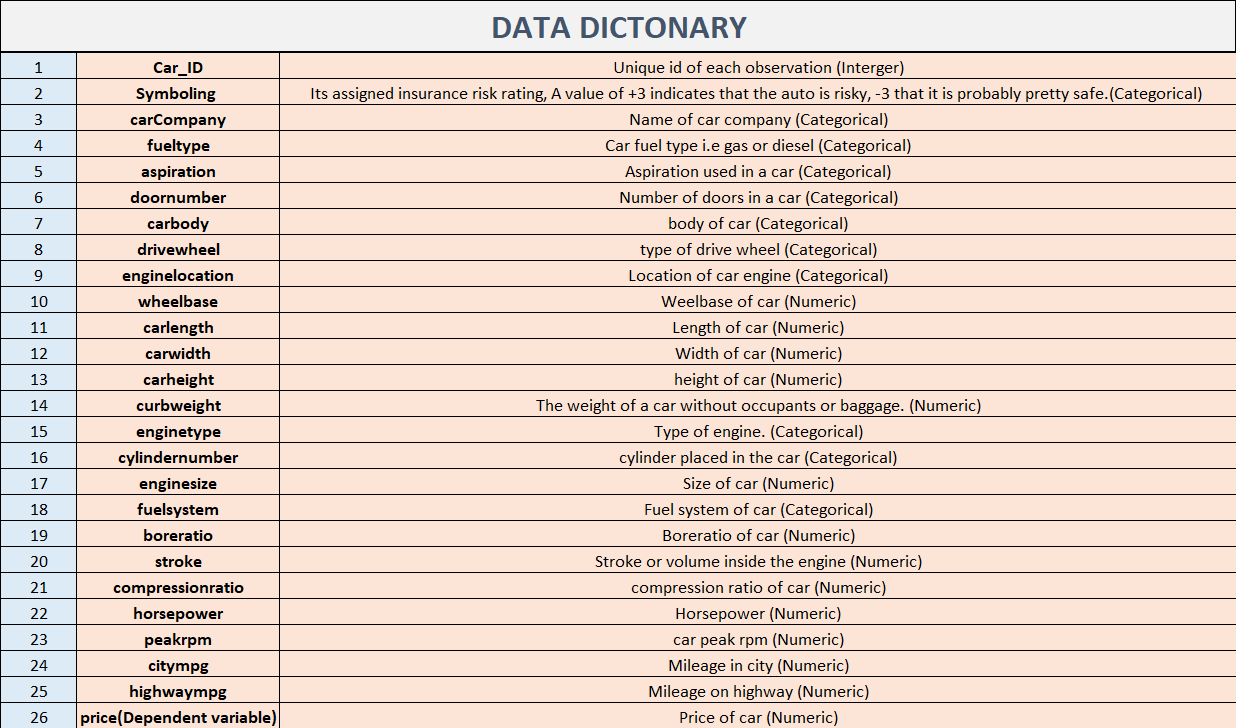
You can download the above XLSX sheet [from this link](https://github.com/hardenedcotton/ML_Project/blob/main/Data%20Dictionary%20-%20carprices.xlsx?raw=true).


In [6]:
cat_data = data.drop('CarName', axis=1)
cat_columns = [
    'carbody',
    'fueltype',
    'fuelsystem',
    'aspiration',
    'drivewheel',
    'doornumber',
    'enginelocation',
    'enginetype',
    'cylindernumber',
]
for cat in cat_columns:
    cat_code = cat + '_code'
    cat_data[cat] = pd.Categorical(cat_data[cat])
    cat_data[cat_code] = cat_data[cat].cat.codes

In [7]:
data_table.DataTable(cat_data, max_columns=35, include_index=False, num_rows_per_page=10)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,price,carbody_code,fueltype_code,fuelsystem_code,aspiration_code,drivewheel_code,doornumber_code,enginelocation_code,enginetype_code,cylindernumber_code
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,13495.0,0,1,5,0,2,1,0,0,2
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,16500.0,0,1,5,0,2,1,0,0,2
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,16500.0,2,1,5,0,2,1,0,5,3
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,13950.0,3,1,5,0,1,0,0,3,2
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,17450.0,3,1,5,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,16845.0,3,1,5,0,2,0,0,3,2
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,19045.0,3,1,5,1,2,0,0,3,2
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,21485.0,3,1,5,0,2,0,0,5,3
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,22470.0,3,0,3,1,2,0,0,3,3


In [8]:
cat_data = cat_data.drop(cat_columns, axis=1)
cat_data['symboling'] += 3
print(f'Original data shape: {data.shape}')
print(f'Categorized data shape: {cat_data.shape}')

Original data shape: (205, 26)
Categorized data shape: (205, 25)


In [9]:
price_col = cat_data.pop('price')
cat_data.insert(len(cat_data.columns), 'price', price_col)

In [10]:
body_type_dict = {
                'unique_number': data['carbody'].nunique(),
                'unique_classes': data['carbody'].unique().tolist(),
                'unique_times_used': data['carbody'].value_counts().to_dict()
                }
pprint(body_type_dict)

{'unique_classes': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'unique_number': 5,
 'unique_times_used': {'convertible': 6,
                       'hardtop': 8,
                       'hatchback': 70,
                       'sedan': 96,
                       'wagon': 25}}


In [11]:
data_table.DataTable(cat_data, max_columns=30, include_index=False, num_rows_per_page=10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,carbody_code,fueltype_code,fuelsystem_code,aspiration_code,drivewheel_code,doornumber_code,enginelocation_code,enginetype_code,cylindernumber_code,price
0,1,6,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,5,0,2,1,0,0,2,13495.0
1,2,6,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,5,0,2,1,0,0,2,16500.0
2,3,4,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,2,1,5,0,2,1,0,5,3,16500.0
3,4,5,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,3,1,5,0,1,0,0,3,2,13950.0
4,5,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,3,1,5,0,0,0,0,3,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,2,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,3,1,5,0,2,0,0,3,2,16845.0
201,202,2,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,3,1,5,1,2,0,0,3,2,19045.0
202,203,2,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,3,1,5,0,2,0,0,5,3,21485.0
203,204,2,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,3,0,3,1,2,0,0,3,3,22470.0


# KNN

---



In [70]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors()

In [71]:
model_knn.fit(cat_data.values)

NearestNeighbors()

In [82]:
car_name = 'nissan gt-r'
query_index = data[data['CarName']==car_name].index.values[0]
distances, indices = model_knn.kneighbors(cat_data.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

In [93]:
cars = []
distance = []

for i in range(0, len(distances.flatten())):
    cars.append(data['CarName'][indices.flatten()[i]])
    distance.append(distances.flatten()[i])    

c = pd.Series(cars, name='car')
d = pd.Series(distance, name='distance')
recommend = pd.concat([c, d], axis=1)
recommend = recommend.sort_values('distance')

print(f'Recommendations for {data["CarName"][query_index]}:\n')

for i in range(1, recommend.shape[0]):  
    print(f'{i}: {recommend["car"].iloc[i]}, with distance of {recommend["distance"].iloc[i]:.3f}')

Recommendations for nissan gt-r:

1: subaru, with distance of 145.009
2: toyota corolla 1200, with distance of 153.552
3: toyota mark ii, with distance of 187.605
4: toyota corona hardtop, with distance of 326.574
5: mazda glc deluxe, with distance of 366.376


In [84]:
idx = []
for car in cars:
    idx.append(data[data['CarName']==car].index.values[0])

data_table.DataTable(data.iloc[idx], max_columns=30, include_index=False, num_rows_per_page=10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
152,153,1,toyota corolla 1200,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0
156,157,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0
153,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
54,55,1,mazda glc deluxe,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395.0


In [86]:
car_name2 = 'mitsubishi lancer'
query_index2 = data[data['CarName']==car_name2].index.values[0]
distances2, indices2 = model_knn.kneighbors(cat_data.iloc[query_index2,:].values.reshape(1,-1), n_neighbors = 6)

In [87]:
indices, indices2

(array([[ 90, 141, 157, 156, 153,  54]]),
 array([[ 77, 120,  24,  19,  22,  20]]))

In [92]:
cars2 = []
distance2 = []

for i in range(0, len(distances2.flatten())):
    cars2.append(data['CarName'][indices2.flatten()[i]])
    distance2.append(distances2.flatten()[i])    

c2 = pd.Series(cars2, name='car')
d2 = pd.Series(distance2, name='distance')
recommend2 = pd.concat([c2, d2], axis=1)
recommend2 = recommend2.sort_values('distance')

print(f'Recommendations for {data["CarName"][query_index2]}:\n')

for i in range(1, recommend2.shape[0]):  
    print(f'{i}: {recommend2["car"].iloc[i]}, with distance of {recommend2["distance"].iloc[i]:.3f}')

Recommendations for mitsubishi lancer:

1: plymouth fury iii, with distance of 63.122
2: dodge monaco (sw), with distance of 70.316
3: chevrolet monte carlo, with distance of 172.011
4: dodge challenger se, with distance of 207.360
5: chevrolet vega 2300, with distance of 404.429


In [89]:
idx2 = []
for car in cars2:
    idx2.append(data[data['CarName']==car].index.values[0])

data_table.DataTable(data.iloc[idx2], max_columns=30, include_index=False, num_rows_per_page=10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
77,78,2,mitsubishi lancer,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189.0
118,119,1,plymouth fury iii,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,37,41,5572.0
24,25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295.0
22,23,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6377.0
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0


# Regression

---



In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [13]:
x = cat_data.iloc[:, :-1].values
y = cat_data['price'].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y.astype(int), test_size = 0.15, random_state = 0)

## Models

### Linear

---



In [52]:
linear = LinearRegression()
linear.fit(x_train, y_train)
print(linear.score(x_train, y_train)*100)
print(linear.score(x_test, y_test)*100)

89.84635667842232
81.13963858564709


In [16]:
linear_pred = linear.predict(x_test)

In [17]:
linear.coef_

array([-1.72353088e+01,  1.51365858e+02,  1.00385405e+02,  3.60833306e-01,
        7.62413657e+02,  1.87529001e+02,  2.85355473e+00,  8.85980065e+01,
       -1.55772816e+03, -3.12492020e+03, -2.49763922e+01,  1.60432660e+01,
        1.87356727e+00, -4.04827127e+01,  5.84368914e+01, -8.47878385e+02,
       -1.59109929e+03,  3.20006963e+01,  4.95972514e+02,  1.19092298e+03,
       -5.71226610e+02,  1.12853579e+04,  1.54453448e+02, -4.69420917e+01])

In [20]:
err_percent_linear = (linear_pred/y_test)*100

### Ridge

---



In [53]:
ridge = Ridge()
ridge.fit(x_train, y_train)
print(ridge.score(x_train, y_train)*100)
print(ridge.score(x_test, y_test)*100) 

89.5754867436097
80.9610335728346


In [50]:
ridge_pred = ridge.predict(x_test)

In [23]:
ridge.coef_

array([-1.66271977e+01,  2.02946654e+02,  9.82969194e+01, -1.17122988e+01,
        6.47239018e+02,  2.42201056e+02,  2.59843051e+00,  8.45244464e+01,
       -8.72924931e+02, -2.79356795e+03,  1.48395194e+02,  3.59328936e+01,
        1.94773581e+00, -6.33258358e+01,  7.51684136e+01, -9.69261481e+02,
       -1.31916310e+02, -2.40500577e+01,  1.56601097e+02,  1.18867761e+03,
       -7.59836142e+02,  6.71326336e+03,  2.18775258e+02, -2.23512431e+02])

In [26]:
err_percent_ridge = (ridge_pred/y_test)*100

### Lasso

---



In [54]:
lasso = Lasso(alpha=0.01, max_iter=10**9)
lasso.fit(x_train, y_train)
print(lasso.score(x_train, y_train)*100)
print(lasso.score(x_test, y_test)*100)

89.84635644043438
81.14131818132341


In [57]:
lasso_pred = lasso.predict(x_test)

In [29]:
lasso.coef_

array([-1.72372019e+01,  1.51336717e+02,  1.00408984e+02,  3.44960816e-01,
        7.62292062e+02,  1.87530874e+02,  2.85386700e+00,  8.85905652e+01,
       -1.55685401e+03, -3.12398200e+03, -2.40394414e+01,  1.60497569e+01,
        1.87319638e+00, -4.05260023e+01,  5.84397500e+01, -8.47808341e+02,
       -1.57846418e+03,  3.20302751e+01,  4.96334631e+02,  1.19072699e+03,
       -5.71018916e+02,  1.12843285e+04,  1.54483356e+02, -4.72225368e+01])

In [32]:
err_percent_lasso = (lasso_pred/y_test)*100

### Logistic

---



In [55]:
logistic = LogisticRegression(solver='liblinear', max_iter=10**6)
logistic.fit(x_train, y_train)
print(logistic.score(x_train, y_train)*100)
print(logistic.score(x_test, y_test)*100)

96.55172413793103
3.225806451612903


In [34]:
logistic_predict = logistic.predict(x_test)

In [46]:
logistic.coef_

array([[-5.90336642e-02,  2.19940120e-02,  3.41091671e-01, ...,
        -2.09726771e-06,  1.47442768e-02,  1.00220555e-02],
       [ 3.65990902e-01,  2.19049232e-02,  4.02801566e-01, ...,
        -1.33922995e-07,  1.22526283e-02,  8.12609600e-03],
       [-7.80570943e-03, -7.67849766e-03,  1.46340164e-01, ...,
        -4.22591893e-08,  1.91220985e-03,  1.21254404e-03],
       ...,
       [ 3.04185436e-02,  8.75798634e-05,  1.84037598e-02, ...,
        -1.81650373e-08,  6.47725186e-03, -3.76863156e-03],
       [-4.59861863e-01, -1.23934432e-01, -5.11865990e-01, ...,
        -8.40149027e-06, -2.84916267e-02, -3.25009662e-04],
       [ 7.99353250e-02,  3.73020864e-02, -5.81120756e-02, ...,
        -1.31353922e-03,  1.00161738e-02, -3.16211976e-02]])

In [36]:
err_percent_logistic = (logistic_predict/y_test)*100

### Decision Tree

---



In [37]:
dtree = DecisionTreeRegressor()

In [56]:
dtree.fit(x_train, y_train)
dtree_predict = dtree.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, dtree_predict)))
print(dtree.score(x_train, y_train)*100)
print(dtree.score(x_test, y_test)*100)

2739.2186665590984
100.0
77.48014669402967


In [39]:
dtree.get_depth(), dtree.get_n_leaves()

(15, 165)

In [40]:
err_percent_dtree = (dtree_predict/y_test)*100

## Comparison

---



In [41]:
models = [
    ('Linear', err_percent_linear),
    ('Ridge', err_percent_ridge),
    ('Lasso', err_percent_lasso),
    ('Logistic', err_percent_logistic),
    ('Decision Tree', err_percent_dtree),
]

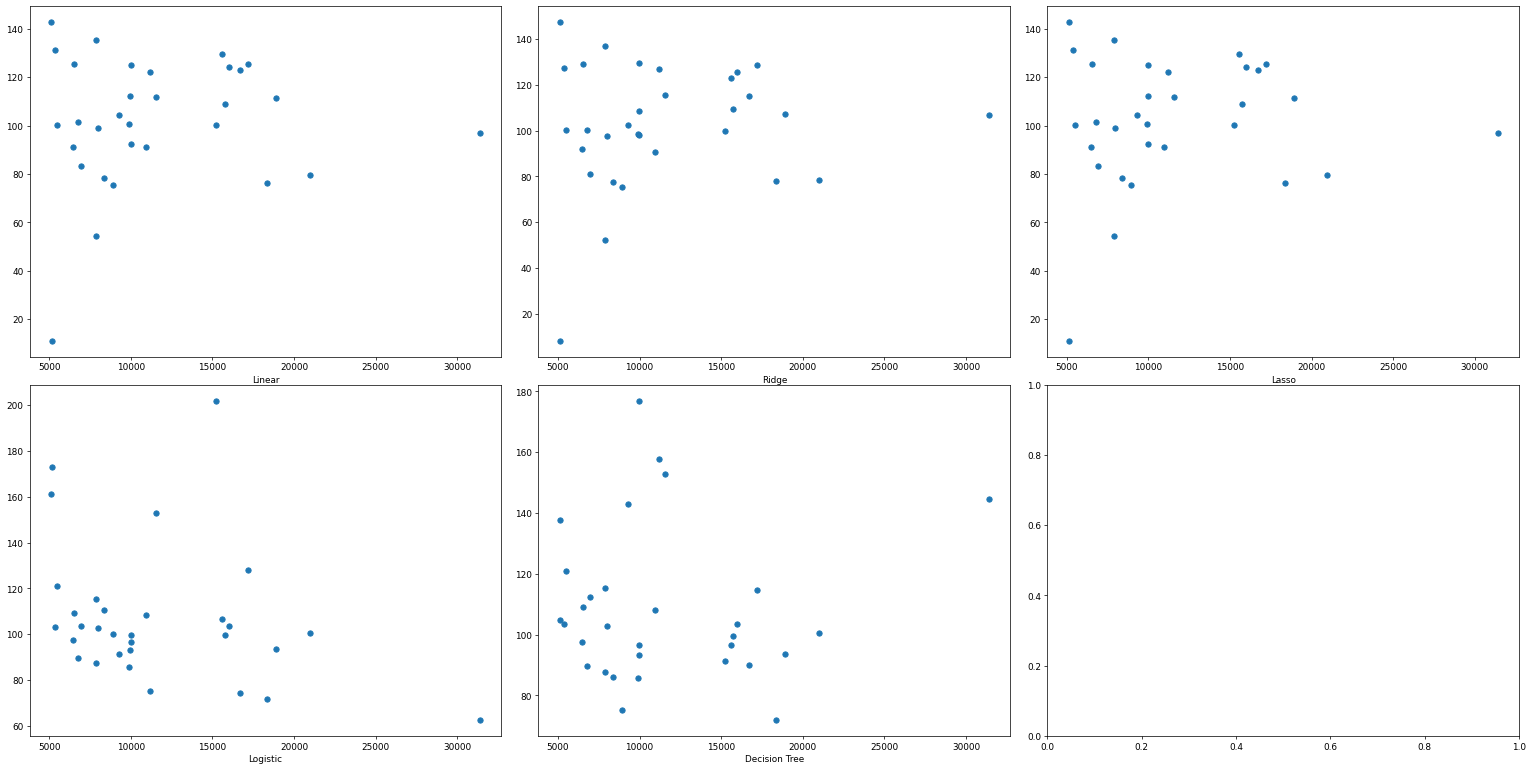

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(24,12), dpi=64)

plt.tight_layout()
ax = ax.flatten()

for i, err in enumerate(models):
    ax[i].scatter(y_test, err[1])
    plt.setp(ax[i], xlabel=err[0])